# HOW TO CLEAN DATA WITH PYTHON
Cleaning US Census Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob



# import the csv files using the pandas 

In [8]:
files = glob("states*.csv")
print (files)

['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']


In [12]:
us_sensus = pd.concat((pd.read_csv(file)for file in files), ignore_index=True)
print ("all data from the states csv files")
us_sensus.head(10)

all data from the states csv files


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


# checking the data type and column of data 

In [14]:
us_sensus.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

# 4.
Look at the .head() 
*of the DataFrame so that you can understand 

*why some of these dtypes are objects instead of integers or floats.

*Regex to the Rescue

In [15]:
us_sensus.head().dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

# 5.
Use regex to turn the Income column into a format 

*that is ready for conversion into a numerical type.


In [25]:
# removing the $ sign from the incomme column 
us_sensus["Income"] = us_sensus["Income"].replace("\$", "", regex=True)
us_sensus["Income"] = us_sensus["Income"].astype(float)

In [28]:
print ("After converting the column data into the float data type ")
us_sensus["Income"].dtypes

After converting the column data into the float data type 


dtype('float64')

# 6.
*Look at the GenderPop column. 

*We are going to want to separate this into two columns, 

*the Men column, and the Women column.

In [30]:
print ("spliting the GenderPop column in to 2 seperate column after _")
Genderpop_split = us_sensus["GenderPop"].str.split("_", expand=True)
us_sensus.head(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [34]:
print ("Making the male column and assgn the value of male column ")
us_sensus["Male"] = Genderpop_split[0].str.extract("(\d+)", expand=True)

Making the male column and assgn the value of male column 


In [38]:
print ("Making the female column and assgn the value of female column ")
us_sensus["Female"] = Genderpop_split[1].str.extract("(\d+)", expand=True)


Making the female column and assgn the value of female column 


In [42]:
us_sensus.head(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


7.
*Convert both of the columns into numerical datatypes.

*There is still an M or an F character in each entry! 

*We should remove those before we convert


In [45]:
print ("we already remove the M and F character from each entity ")
print ()
us_sensus["Male"] = pd.to_numeric(us_sensus["Male"])
us_sensus["Female"] = pd.to_numeric(us_sensus["Female"])
print ("after the converting the column the data type is ", us_sensus["Male"].dtypes)

we already remove the M and F character from each entity 

after the converting the column the data type is  int64


# now time to removing the non usable columns 

In [73]:
us_sensus.drop(["Unnamed: 0", "GenderPop"], axis=1)
us_sensus.drop(["Unnamed: 0", "GenderPop"], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
6,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.560588,1751607,1841615.0
8,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.976636,448413,478041.0
9,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.363636,306674,340810.0


# 8.
*Now you should have the columns you need to make the graph 

*and make sure your boss does not slam a ruler angrily on 

*your desk because you’ve wasted your whole day cleaning your data with no results to show!

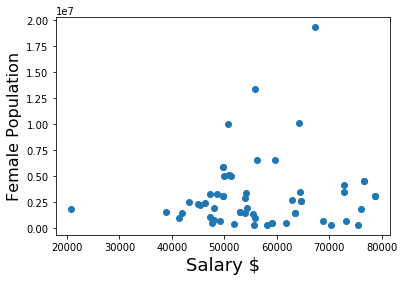

In [74]:
plt.scatter(us_sensus["Income"], us_sensus["Female"])
plt.xlabel("Salary $", fontsize = 18)
plt.ylabel("Female Population", fontsize = 16)
plt.show()

# 9.
*Did you get an error? These monstrous csv files probably 

*have nan values in them! Print out your column with the number of women per state to see.

*We can fill in those nans by using pandas’ .fillna() function.

*You have the TotalPop per state, and you have the Men per state. 

*As an estimate for the nan values in the Women column, 

*you could use the TotalPop of that state minus the Men for that state.

*Print out the Women column after filling the nan values to see if it worked!

In [75]:
null_values = us_sensus["Female"][us_sensus["Female"].isnull()]

print (null_values)

Series([], Name: Female, dtype: float64)


# filling the values in those nans by using pandas’ .fillna() function.

In [78]:
population = us_sensus["TotalPop"] - us_sensus["Male"]
us_sensus["Female"] = us_sensus["Female"].fillna(value=population)

us_sensus.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
6,0,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,1,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.560588,1751607M_1841615F,1751607,1841615.0
8,2,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.976636,448413M_478041F,448413,478041.0
9,3,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.363636,306674M_340810F,306674,340810.0


# 10.
*We forgot to check for duplicates! Use .duplicated() on your census DataFrame 

*to see if we have duplicate rows in there.

11.
Drop those duplicates using the .drop_duplicates() function.


In [79]:
duplicate_row = us_sensus[us_sensus.duplicated()]
us_sensus.drop_duplicates(keep = "first", inplace= True)
us_sensus.drop(["Unnamed: 0", "GenderPop"], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
6,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.560588,1751607,1841615.0
8,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.976636,448413,478041.0
9,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.363636,306674,340810.0


In [80]:
us_sensus.duplicated().any()

False

# 12.
*Make the scatterplot again. Now, it should be perfect! Your job is secure, for now

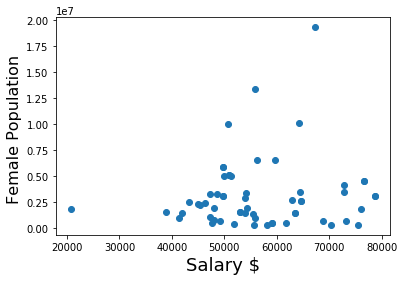

In [81]:
plt.scatter(us_sensus["Income"], us_sensus["Female"])
plt.xlabel("Salary $", fontsize = 18)
plt.ylabel("Female Population ", fontsize = 16)
plt.show()


In [84]:
us_sensus = us_sensus.replace("%*", "", regex=True)
us_sensus.drop(["Unnamed: 0", "GenderPop"], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
6,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.560588,1751607,1841615.0
8,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.976636,448413,478041.0
9,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.363636,306674,340810.0


# 13.
*Now, your boss wants you to make a bunch of histograms out of the race data that you have. 

*Look at the .columns again to see what the race categories are

In [92]:
us_sensus[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]] = us_sensus[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].apply(pd.to_numeric)
us_sensus[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].fillna(0)


,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
6,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609


# 14.
*Try to make a histogram for each one!

*You will have to get the columns into numerical format, 

*and those percentage signs will have to go.

*Don’t forget to fill the nan values with something that makes sense! 

*You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

*Get Creative


In [94]:
us_sensus["Hispanic"].isnull().any()

False

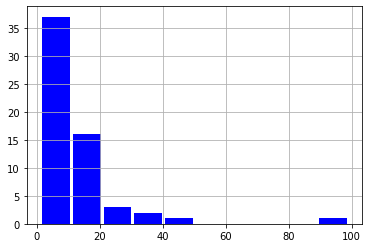

In [102]:
# making the spaces between the bars thorugh rwidth=0.90 method 
us_sensus["Hispanic"].hist(rwidth=0.90, color="blue")

In [99]:
us_sensus["White"].isnull().any()

False

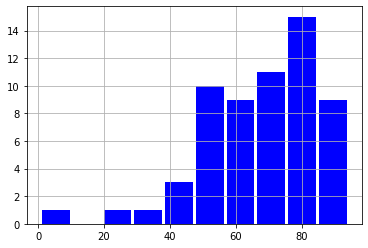

In [101]:
# making the spaces between the bars thorugh rwidth=0.90 method 
us_sensus["White"].hist(rwidth=0.90, color="blue")

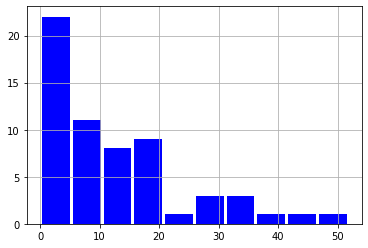

In [103]:
us_sensus["Black"].hist(rwidth = 0.90, color = "blue")

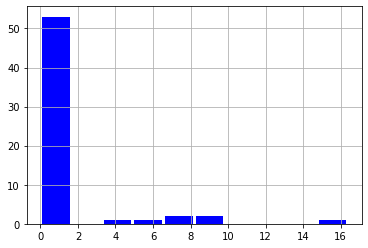

In [104]:
us_sensus["Native"].hist(rwidth=0.90, color = "blue")

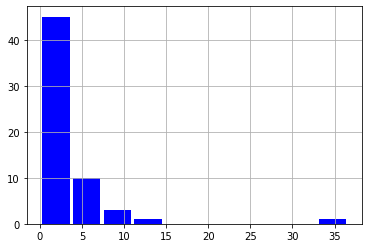

In [105]:
us_sensus["Asian"].hist(rwidth = 0.90, color = "blue")

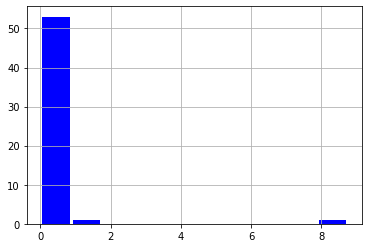

In [106]:
us_sensus["Pacific"].hist(rwidth = 0.90, color = "blue")